# Wavelets

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.chdir("../..")

In [2]:
%matplotlib inline
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-1, 1, 200, endpoint=False)


200

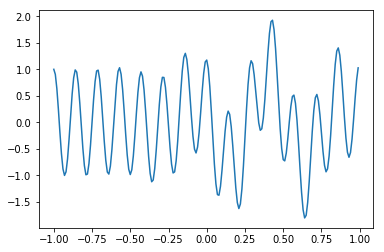

In [3]:

sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

plt.plot(t, sig)

len(sig)

In [28]:
help(signal.cwt)

Help on function cwt in module scipy.signal.wavelets:

cwt(data, wavelet, widths)
    Continuous wavelet transform.
    
    Performs a continuous wavelet transform on `data`,
    using the `wavelet` function. A CWT performs a convolution
    with `data` using the `wavelet` function, which is characterized
    by a width parameter and length parameter.
    
    Parameters
    ----------
    data : (N,) ndarray
        data on which to perform the transform.
    wavelet : function
        Wavelet function, which should take 2 arguments.
        The first argument is the number of points that the returned vector
        will have (len(wavelet(length,width)) == length).
        The second is a width parameter, defining the size of the wavelet
        (e.g. standard deviation of a gaussian). See `ricker`, which
        satisfies these requirements.
    widths : (M,) sequence
        Widths to use for transform.
    
    Returns
    -------
    cwt: (M, N) ndarray
        Will have shape of

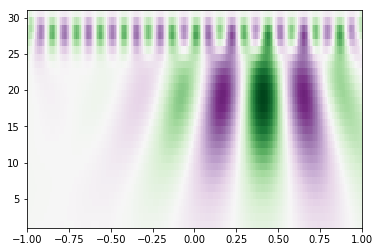

In [4]:
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max());

In [5]:
cwtmatr.shape

(30, 200)

# Ricker Signal

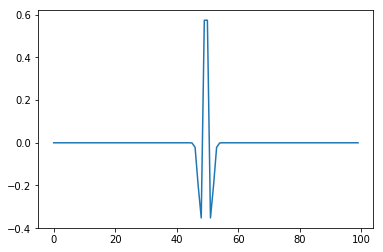

In [51]:
plt.plot(np.arange(0, 100), signal.ricker(100, 1))

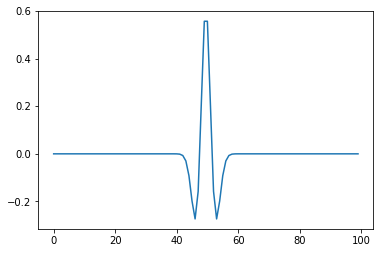

In [52]:
plt.plot(np.arange(0, 100), signal.ricker(100, 2))

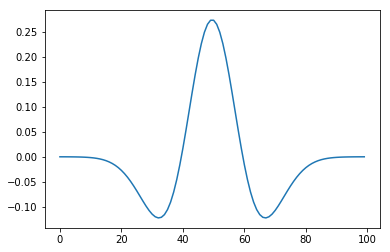

In [53]:
plt.plot(np.arange(0, 100), signal.ricker(100, 10))

# On a subject

In [56]:
import pandas as pd
from p300.data import get_data_for, get_features_for, get_subject_ids

hdf = pd.HDFStore("output/instances.h5")
data_key = "plain"

subject_ids = get_subject_ids(hdf, data_key)

In [92]:
sid = subject_ids[12]

In [93]:
data = get_data_for(hdf, data_key, sid)

data[["target"]]

,target
0,False
1,False
2,True
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [121]:


instance = data.iloc[26]
array_path = instance.array_path

print(array_path)

/home/jmperez/projects/p300-jmp/output/npy/10229001_26.npy


In [90]:
instance.target

True

Channel 0


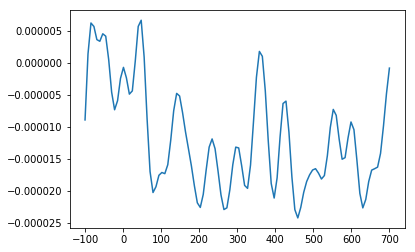

Channel 1


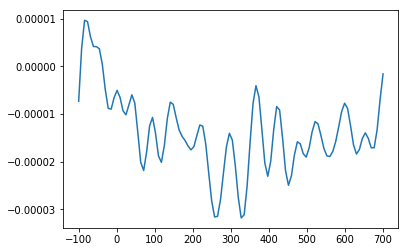

Channel 2


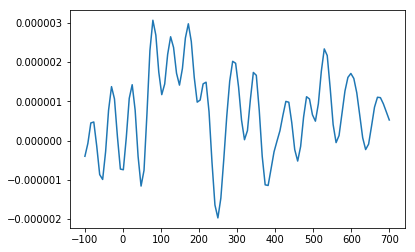

Channel 3


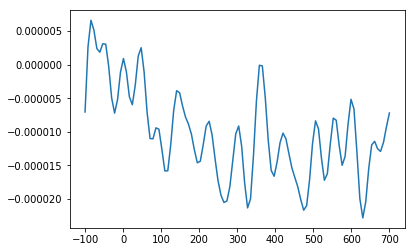

Channel 4


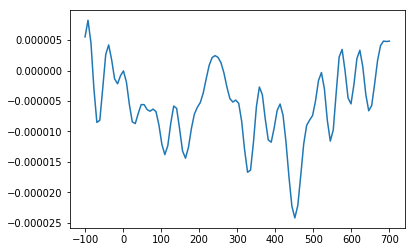

Channel 5


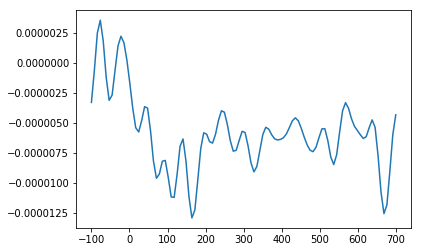

Channel 6


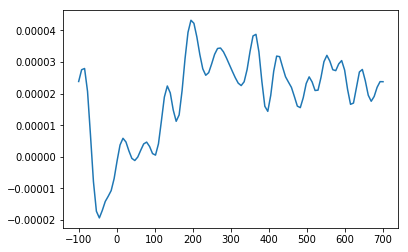

Channel 7


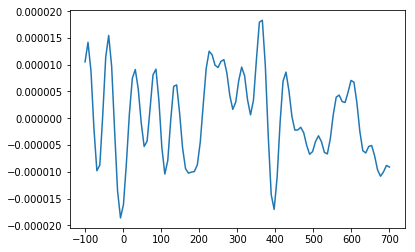

Channel 8


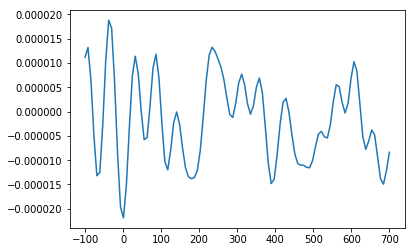

Channel 9


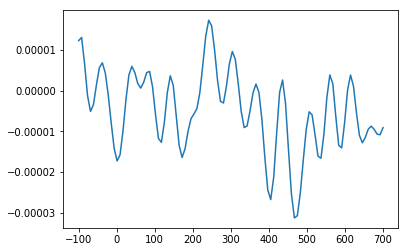

Channel 10


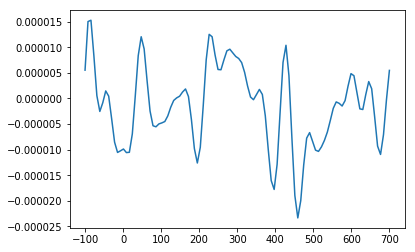

Channel 11


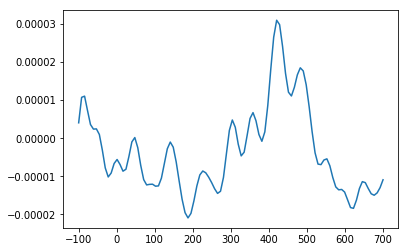

Channel 12


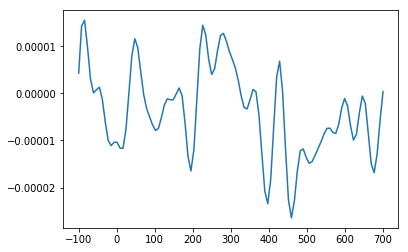

Channel 13


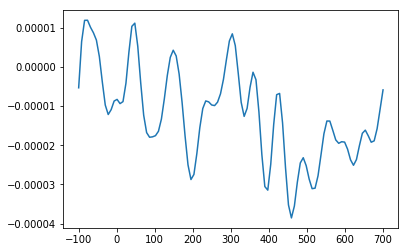

Channel 14


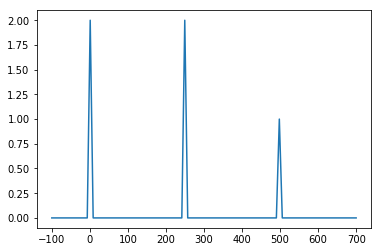

In [91]:
X = np.load(array_path)

for j in range(X.shape[0]):
    T = np.linspace(-100, 700, num=X.shape[1])
    print("Channel {}".format(j))
    plt.plot(T, X[j, :])
    plt.show()

In [95]:
cwt = signal.cwt(X[1, :], signal.ricker, widths=np.arange(1,40,2))

cwt.shape

(20, 104)

In [111]:
cwt.reshape(-1)

(2080,)

In [118]:
cwts = []

# Exclude last channel
for j in range(X.shape[0]-1):
    cwt = signal.cwt(X[j, :], signal.ricker, widths=np.arange(1,40,3))
    cwts.append(cwt.reshape(-1))

In [119]:
features = np.concatenate(cwts)

features.shape

(18928,)